<a href="https://colab.research.google.com/github/Taeho-Kim-0322/Machine-learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%86%B5%EA%B3%84_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6. Lasso, Ridge, PCR이해하기

## 

(기억 상기)
- Bias : f 모델을 설정함으로써 필연적으로 생길 수 밖에 없는 오차 (e.g. 선형식을 선택함으로써 생기는 오류)
- Variance : Training Data가 변경될 때마가 추정한 f가 변동되는 오차 (e.g. 데이터가 변경됨에 따라 회귀계수의 변동) ▶ 데이터 의존도

- Bias ↔ Variance Trade-off

- flexible하다 = overfitting되었다
  - overfitting 방지를 위해 Generalization, Early Stopping 등등
  - [Generalization]
    - L1 norm(계단거리) : Lasso
    - L2 norm(직선거리) : Ridge
    - 계수들을 '0'으로 보내는 상수항을 추가하여 Shrinkage 효과를 넣음
    - Bias를 조금 올리는 대신 Variance를 크게 감소시켜 overfitting을 막음
    - 데이터 n보다 변수 p가 월등히 많을 때, p>n일 때 효과적임
    - Lasso ↔ Ridge


#7. 비선형모델

- standard linear model들은 모델의 단순성으로 인해 해석과 추론이 쉽다는 장점이 있으나, 예측력이라는 중요한 부분에서 한계를 가짐
- 해석력은 가능한 잃지 않으면서 선형 가정을 완화시키는 방법들을 다룸

## [요약]
- Plynomial regression은 기존의 변수의 다차항(X2, X3 등)을 추가하여 non-linear data에 적합을 할 수 있도록 선형모델을 확장함
- Step function은 변수를 K개의 부분으로 나누어, 질적변수(즉, constant)를 만들어 낸다. 이는 piecewise constant function을 적합하는 효과를 가짐
- Regression splines은 위의 두 방식의 확장으로, 전체 X를 똑같이 K개의 범주로 나누되 각 범주내에서 다항적합을 하는 것이다.
- Local regression은 spline 방식과 유사하지만 각 범주가 겹칠수 있다는 점에서 다름.
- Generalized additive model은 위의 방식들을 여러개의 예측변수들에 적용할 수 있게 하는 방식임


##7.1 Polynomial Regression
- 가장 기본적인 비선형 모델은 다항식을 추가해 다항회귀 식을 만드는 것이다.
- 일반적으로 3,4차항 이상까지는 포함시키지 않음.

##7.2 Step Functions
 - 다항함수는 예측변수의 전체 구간에 non-linear형태를 부여하는 것임
 - 반면, Step Function에서는 전체 X를 몇 개의 구간으로 나눔. 그리고 그 구간마다 일정한 상수를 부여함.
 - 이는 사실 연속형인 반응변수 Y를 몇 개의 범주형 변수로 바꿔서 부여하는 것과 같음
 - 주로 생물통계학이나 전염병학에서 자주 사용됨
 - 구간을 어떻게 자르느냐에 따라 제대로 작동하지 못할 수 있음을 유의

 ##7.3 Basis Functions
  - yi=β0+β1b1(xi)+β2b2(xi)+..+βKbK(xi)+ϵi
  - 앞서 다룬 다항회귀, 스텝펑션은 basis function의 특별한 형태로 볼 수 있음
  - xi들에 대한 여러 함수들로 식을 표현하는 것으로, bk(xi) 가 어떤 형태일지는 분서각가 미리 정해놓음

##7.4 Regression Spines

###7.4-1 Piecewise Plynomials
  - 전체 X의 범위에 고차항의 다항적합을 하는 것이 아닌, 몇개의 범주의 범위에 비교적 낮은 차수의 적합을 따로따로 하는 것
  - 각 범주마다 yi=β0,k+β1,kxi+β2,kx2i+β3,kx3i+ϵi를 적합하고, 회귀계수는 범주마다 달라진다.
  - 각 범주가 바뀌는 지점을 knots라고 부름
  - 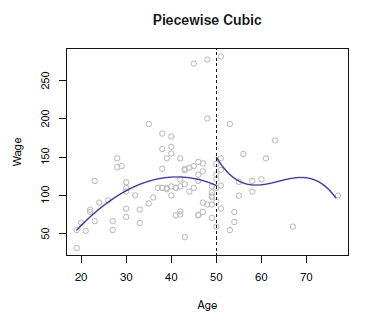
  - 위 그림처럼, knot에서 선이 연결되지 않는 비합리적인 모델이 만들어져 버리기 때문에, 추가적인 방법을 사용함
###7.4-2 Constraints and Splines
  -  knot에서 연결점이 원활하고 합리적으로 설정하기 위해, 1차미분, 2차미분이 가능해야 한다는 조건 등을 추가한다
  - 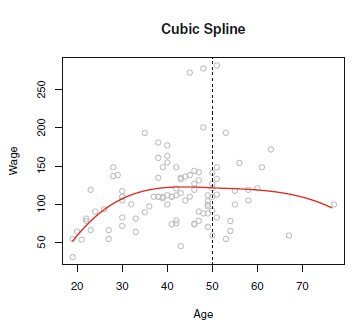
  - 이러한 제약은 자유도를 하나 잃게 된다는 것을 의미함
  - 이를 일반화하면, d차의 spline 적합은 1) 각 piecewise에서 d차 다항적합을 하고, 2) 각 knot에서 (d-1)차까지의 미분이 가능, 즉 매끄럽게 연속적이어야 한다는 제약이 붙는다

###7.4-3 The Splines Basis Representation
 - 어떻게 d차 적합을 하면서도, d-1차까지의 미분이 가능하다는 제약을 달성할 수 있을까?
 - 가장 대표적이고 직접적인 방법으로는 x,x2,x3만을 가지고 있는 삼차 다항식에서 각 knot마다 truncated power basis function을 추가하는 것이다.
 - truncated power basis function은
 - 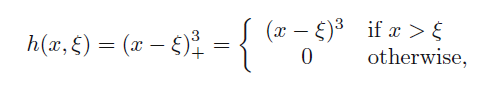
 - 와 같이 표현된다
 - Y=β0+β1X+β2X2+β3X3+β4h(X,ξ1)+..+βK+3h(X,ξK)+ϵi 이 된다.
 - 따라서 K개의 knots가 있을때의 cubic spline적합은, X,X2,X3,h(X,ξ1),...,h(X,ξK)의 K+3개의 예측변수를 가지고 least square적합을 한 것이 된다. 물론 절편항도 필요하니(위의 식에서 β0부터 시작한거) 총 K+4개의 회귀계수를 추정해야 한다. 이러한 이유로 K개의 knots가 있는 cubic spline에서 자유도가 K+4개 인것이다.
 - 그러나 이렇게 구한 cubic spline은 양 끝단 에서 예측의 신뢰구간이 넓어지게 된다. 즉, 예측의 정확도가 떨어지는 것이다. 사실 양끝단의 경우 모델의 분산이 커지는 것은 어느 모델이든 통용되지만, 이 경우 non-linear적합을 하고자 하였으므로 그 분산이 더 커지게 된다.(flexibility가 클수록 Variance도 크다는것 상기). 다항적합의 경우 양끝단에서 모형이 지나치게 급변하는 것은 고질적인 문제이다. 따라서 데이터의 양끝단, 즉 가장 왼쪽의 knot보다도 왼쪽에 있는 데이터와, 가장 오른쪽끝쪽에 있는 knot보다 오른쪽에 있는 데이터의 경우 선형 적합을 하여 이러한 문제를 완화하고자 하기도 한다. 이를 Natural Cubic Spiline이라 부른다. 아래의 그림을 보면, natural cubic spline의 경우가 양끝단에서 신뢰구간의 범위가 비교적 더 좁아졌음을 알 수 있다.
 - 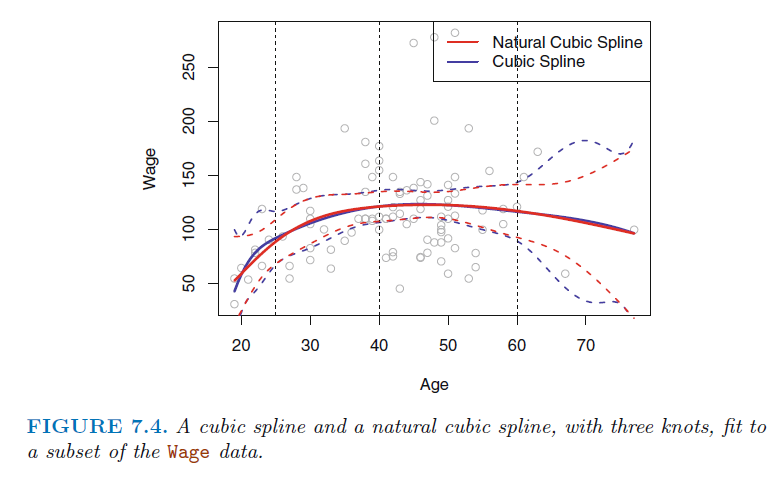

###7.4-4 Choosing the Number and Location of the Knots
 - 어디에, 또 몇 개의 knot을 설정해야 할 것인가? knot이 무수히 많이 설정하면 모델은 지나치게 flexible해질 것임
 - 데이터가 빠르게 변동하는, 그래서 flexible한 형태가 필요해 보이는 지점에선 많은 knot를 배정하고, 상대적으로 안정되보이는 지점에선 적은수의 knot를 지정하는 방식을 사용할 수 있을 것이다.

 - 해당 방법 역시 좋은 접근이 될 수 있지만, 예측 변수가 많아질 수록 어느부분에서 flexible한 함수가 필요할지 직관적으로 알기 힘들때가 많다. 따라서 좀더 알고리즘적으로 적용될 수 있는 방식을 알아보자. 적정한 degrees of freedom을 설정하고 그에 따라 균등한 qunatile에 knot를 배정하는 것이다. 다음 그림은, 자유도5를 지정한 경우의 그림이다.

  - 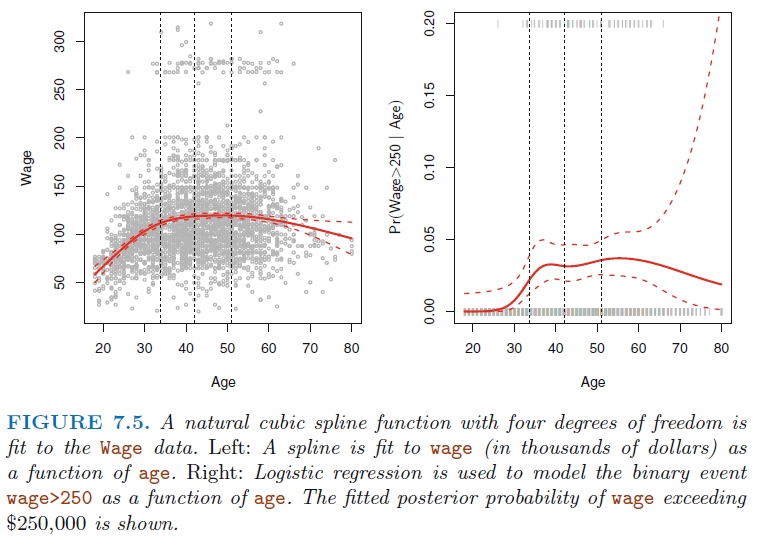
 - 자유도 4를 지정한 경우 natural cubic의 knot는 5개이다. 따라서 boundary knot 2개를 제외하고, 3개의 knot들이 quantile에 따라 자동으로 생긴것을 볼 수 있다. 즉, 25th, 50th, 75th quantile들이 knot로써 배정된 것이다. 이렇게 함으로써, 자료들이 많은 부분에선 많은 knot들을 배정하여 그 자료들이 잠재적으로 가질수 있는 non-linear형태를 반영하고, 자료들이 많지 않은 부분에선 적은 수의 knot들을 배정하려는 전략을 어느정도 달성하게 된다. 
 - 그럼 결국 몇개의 knot들을 설정할지, 즉 자유도를 몇으로 설정할지를 정해야 하는데, 이는 역시나 앞에서 나왔던 Cross-validation으로 결정한다. CV를 통해 본 CV error값이 가장 낮은 자유도의 갯수를 사용하는 것이다.

###7.4-5 Comparison to Polynomial Regression
 - 많은 경우 regression spline이 다항회귀보다 좋은 결과를 가져오는데, flexible하기 위해선 지나치게 차수를 높여가야 하는 반면에(X15차까지 있는 다항회귀를 생각해보자) regression spline은 차수는 유지하면서 knot의 수를 늘림으로써 flexibility를 늘릴 수 있기 때문이다. 따라서 대부분의 경우 regressoin spline이 더욱 안정된 추정을 가능하게 한다. 다음은natural cubic spline과 15차항 적합을 한 다항회귀를 비교한 그림이다. 15차항 적합은 지나친 flexibility로 인해 끝쪽에서 회귀선이 비합리적으로 요동치는 것을 볼 수 있다.
 - 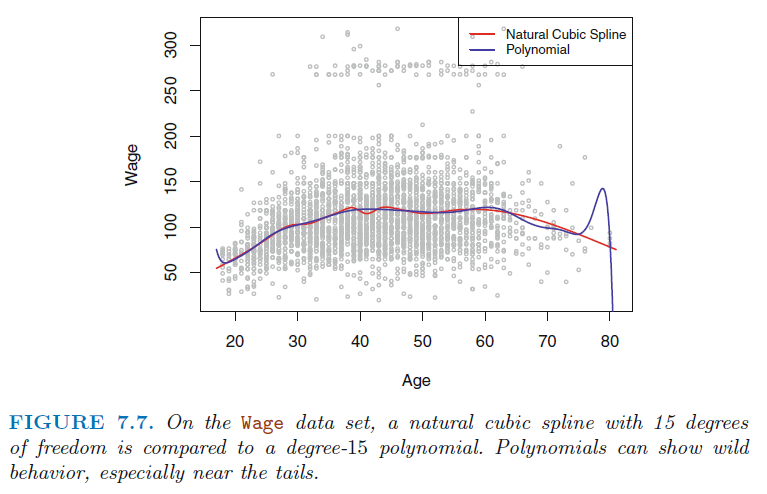